<h5><i>Project 1: Computer Vision</i> | Dr. LaBrie | Winter 2021

In [39]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 13 06:42:02 2021

@author: Angelina Kiman
"""

# import
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [37]:
# Metadata label from Rekognition Custom Label
# 0 = male
# 1 = east asian
# 2 = latino hispanic
# 3 = southeast asian
# 4 = female
# 5 = white
# 6 = middle eastern
# 7 = black
# 8 = indian

raceindices = [1, 2, 3, 5, 6, 7, 8]

# 0 = east asian
# 1 = latino hispanic
# 2 = southeast asian
# 3 = white
# 4 = middle eastern
# 5 = black
# 6 = indian
race2indices = {
        'east asian': 0,
        'latino_hispanic': 1,
        'southeast asian': 2,
        'white': 3,
        'middle eastern': 4,
        'black': 5,
        'indian': 6,
        }

def race2index(racestr):
    return race2indices[racestr.lower()]

def getMostConfRace(data):
    bestrace = ''
    bestconf = -1
    for raceidx in raceindices:
        metadatastr = 'rekognition-custom-labels-evaluation-' + str(raceidx) + '-metadata'
        if metadatastr in data and data[metadatastr]['confidence'] > bestconf:
            bestconf = data[metadatastr]['confidence']
            bestrace = data[metadatastr]['class-name']
    return (bestrace, bestconf)

if __name__ == "__main__":
    
    # open json file
    jsonfile = open('C:\\Users\\angel\\OneDrive\\Documents\\FairFace\\results.json')
    
    # iterate over lines
    confmatrix = np.zeros( (7,7) )
    for row in jsonfile:
        
        # return json object as dictionary
        data = json.loads(row)
        
        # find GT labels for race
        gt_race = data['rekognition-custom-labels-training-1-metadata']['class-name']
        
        # find predictions for race
        (pred_race, highest_conf) = getMostConfRace(data)
        if highest_conf < 0:
            print('error: <0 confidence')
            exit(1)
        
        # put into confusion matrix
        row = race2index(gt_race)
        col = race2index(pred_race)
        confmatrix[row][col] = confmatrix[row][col] + 1
        
    # shutdown
    jsonfile.close()
    
    np.set_printoptions(suppress=True)
    print(confmatrix)

[[1186.   40.  291.   21.    2.    5.    5.]
 [  31. 1012.  104.  158.  121.   51.  146.]
 [ 282.   93.  971.   14.    3.   19.   33.]
 [  36.  287.   19. 1512.  197.   13.   21.]
 [   1.  169.    3.  165.  816.    7.   48.]
 [   4.   97.   30.   11.   10. 1339.   65.]
 [   7.  213.   57.   10.   78.   86. 1065.]]


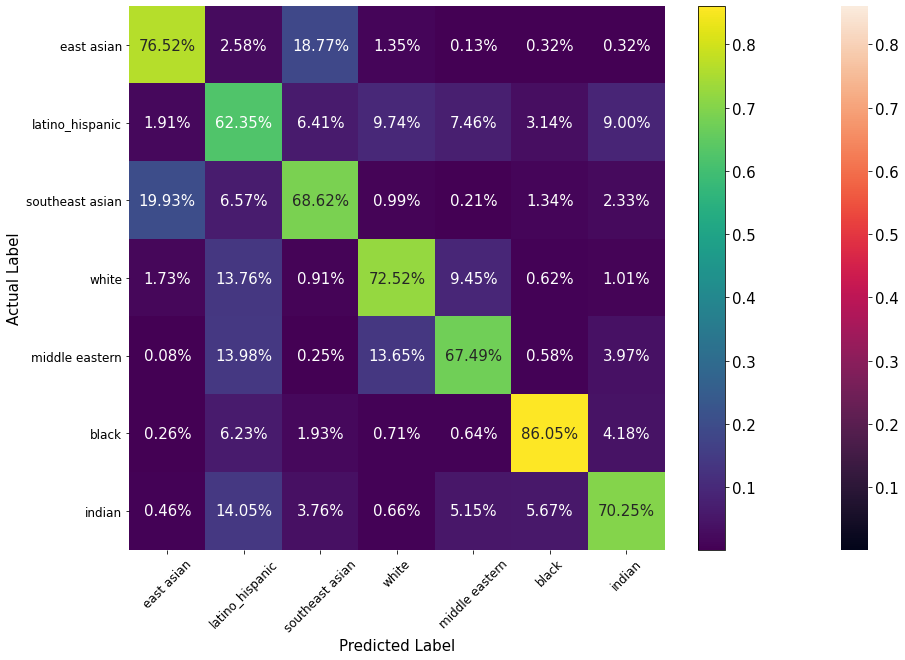

In [129]:
plt.figure(figsize=(15,10))
ax = plt.subplot(111)
labels = {'east asian': 0,
        'latino_hispanic': 1,
        'southeast asian': 2,
        'white': 3,
        'middle eastern': 4,
        'black': 5,
        'indian': 6,}

confmatrix_normalize = confmatrix.astype('float')/confmatrix.sum(axis=1)[:, np.newaxis]

plt.rcParams.update({'font.size': 15})
sns.heatmap(confmatrix_normalize,annot=True,fmt='.2%')
plt.pcolormesh(confmatrix_normalize)
plt.ylabel('Actual Label')
ax.set_yticklabels(labels,rotation=360,fontsize=12)
plt.xlabel('Predicted Label')
ax.set_xticklabels(labels,rotation=45,fontsize=12)
plt.colorbar()